# Project: Sentences similarity

## Team members:

* Khanh Duong Tran.
* Brandon NGUELEWI TOUTSAP.

## Goal: Compare two sentences similarity by calculating Cosine similarity
### Main ideas:

#### 1. Vectorize the sentences.
#### 2. Calculate Cosine similarity.
#### 3. Compare the similarity.

## Vectorize sentences

### Step includes:
#### 1. Process the sentences.
#### 2. Tokenize the sentences.
#### 3. Convert into array.

### Process the sentences:
#### Step includes:

##### 1. Remove non-word character such as punctuation, numbers, emojis, etc.
##### 2. Remove redundant spaces.
##### 3. Convert all to lower case.

In [9]:
from numpy import dot
from numpy.linalg import norm

## Calculate Cosine similarity

### The formula is:

$$
\cos(θ) =  \frac{A \cdot B}{\|A\| \times \|B\|}
$$

## Compare

### We define the threshold for the similarity is 0.5.

In [4]:
import string

def preprocess_sentence(sentence):
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words = sentence.split()
    return words

def create_vocabulary(sentences):
    vocabulary = set()
    for sentence in sentences:
        words = preprocess_sentence(sentence)
        vocabulary.update(words)
    return {word: index for index, word in enumerate(vocabulary)}

def vectorize_sentence(sentence, vocabulary):
    vector = [0] * len(vocabulary)
    words = preprocess_sentence(sentence)
    for word in words:
        if word in vocabulary:
            vector[vocabulary[word]] += 1
    return vector

sentences = ["This is the first sentence.", "This is the second sentence."]
vocabulary = create_vocabulary(sentences)

vector1 = vectorize_sentence(sentences[0], vocabulary)
vector2 = vectorize_sentence(sentences[1], vocabulary)

print(vector1)
print(vector2)

[0, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1]


In [13]:
similitude = dot(vector1, vector2)/(norm(vector1)*norm(vector2))
similitude_percentage = similitude * 100
print('Degree of similarity: {:.2f}%'.format(similitude_percentage))

Degree of similarity: 80.00%


### Calculate angle between the vectors

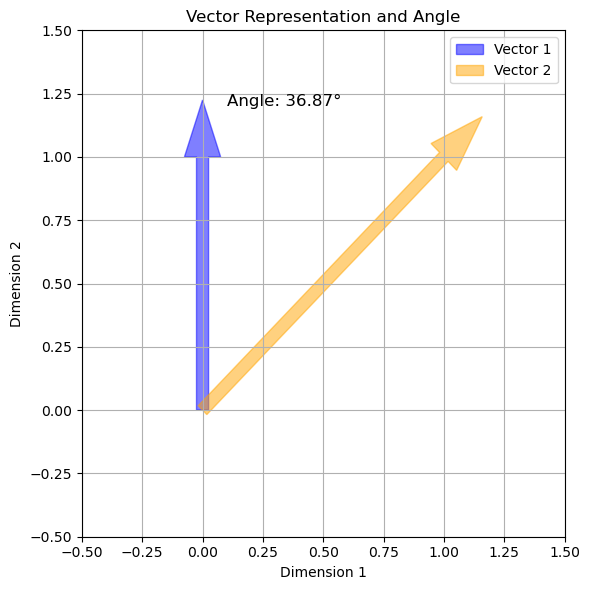

In [22]:
angle_rad = np.arccos(similitude)
angle_deg = np.degrees(angle_rad)

plt.figure(figsize=(6, 6))

# Plot Vector 1 as an arrow
plt.arrow(0, 0, vector1[0], vector1[1], color='blue', width=0.05, label='Vector 1', alpha=0.5)
# Plot Vector 2 as an arrow
plt.arrow(0, 0, vector2[0], vector2[1], color='orange', width=0.05, label='Vector 2', alpha=0.5)


plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Add the angle between vectors as text annotation
plt.text(0.1, 1.2, f'Angle: {angle_deg:.2f}°', fontsize=12)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector Representation and Angle')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
